In [1]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

mp_hands = mp.solutions.hands
mp_drawing=mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './data4'

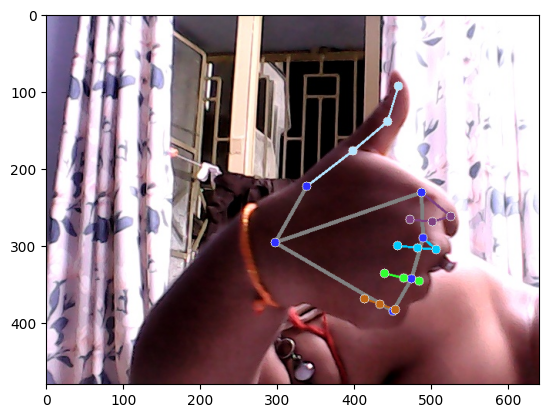

In [3]:
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[99:100]:
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,  # image to draw
                    hand_landmarks,  # model, output
                    mp_hands.HAND_CONNECTIONS,  # hand connections
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())

        plt.figure()
        plt.imshow(img_rgb)

plt.show()
